# 一、高斯分佈

高斯分佈公式：
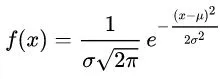

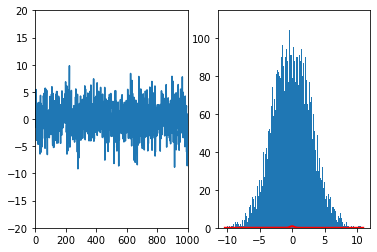

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu ,sigma = 0, 3 #平均值, 標準差
s = np.random.normal(mu, sigma, 10000) # create guassian noise
x = np.arange(10000)
# plot gaussian noise
plt.subplot(1,2,1)
plt.xlim(0, 1000)
plt.ylim(-20,20)
plt.plot(x,s)

# plot gaussian distribution
plt.subplot(1,2,2)
count, bins, ignored = plt.hist(s, 300)
plt.plot(bins, (1 / sigma*np.sqrt(2*np.pi))*
               np.exp(-(bins-mu)**2 / 2*sigma**2), linewidth=2, color='r')

# Gaussian Filter

+ 用途：降低影像雜訊、減少細節
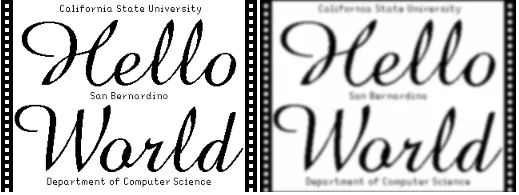


+ 作法：將3*3(舉例)gaussian filter對影像做卷積，卷積完的結果取代中間的pixel
    + 卷積後，9個pixel用一個pixel取代
    + 影像就會變模糊
    
    
+ Gaussian filer由 gaussian function產生
    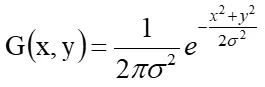

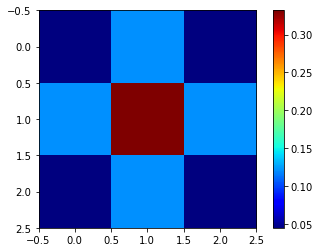

In [2]:
# 如何產生gaussian filter
import numpy as np
import matplotlib.pyplot as plt

#3*3 Gassian filter
x = np.array([[-1, 0, 1],
              [-1, 0, 1],
              [-1, 0, 1]])

y = np.array([[-1, -1, -1],
              [ 0,  0,  0],
              [ 1,  1,  1]])

# sigma = 1
gaussian_kernel = np.exp(- (x**2 + y**2)) 

# normalization
gaussian_kernel = gaussian_kernel/gaussian_kernel.sum()

# plot gausssain filter
plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

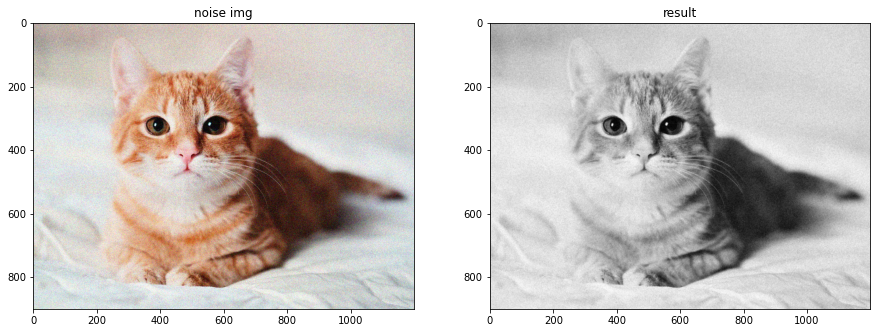

In [19]:
import cv2
from scipy import signal

plt.rcParams['figure.figsize'] = (15,15)

img = cv2.imread('./cat.jpg') 
img = img/255
# 加入高斯雜訊
noise = np.random.normal(0, 0.1, img.shape)
noise_img = img + noise
# 所有值必須介於 0~1 之間，超過1 = 1，小於0 = 0
noise_img = np.clip(noise_img, 0, 1)
noise_img = np.uint8(noise_img*255)
plt.subplot(1,2,1)
plt.title('noise img')
plt.imshow(noise_img[:,:,::-1])

# 影像轉灰階，這樣只需做一次conv
gray = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)

# 3*3 gaussian filter
x, y = np.mgrid[-2:3, -2:3]
gaussian_filter = np.exp(- (x**2 + y**2))
gaussian_filter = gaussian_filter / gaussian_filter.sum()

result = signal.convolve2d(gray, gaussian_filter, boundary='symm', mode='same')
plt.subplot(1,2,2)
plt.title('result')
plt.imshow(result, cmap='gray')

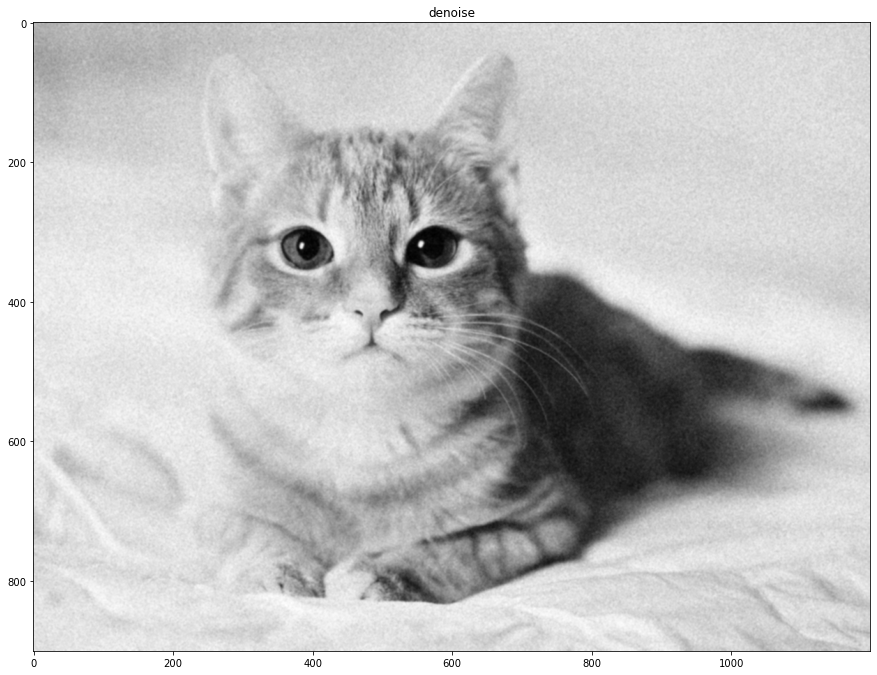

In [21]:
# 直接使用cv2套件
denoise = cv2.GaussianBlur(gray, (5,5), 0, cv2.BORDER_DEFAULT)
plt.title('denoise')
plt.imshow(denoise, cmap='gray')